## Step 1: Import Required Libraries

In [46]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Preprocessing Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Machine Learning Models

from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report, confusion_matrix, roc_curve, auc

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('online_payment_fraud.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Show first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   nameDest        10000 non-null  object 
 5   isFraud         10000 non-null  int64  
 6   oldbalanceOrg   10000 non-null  float64
 7   newbalanceOrig  10000 non-null  float64
 8   oldbalanceDest  10000 non-null  float64
 9   newbalanceDest  10000 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 781.4+ KB
None

First 5 rows of the dataset:
   step      type    amount      nameOrig      nameDest  isFraud  \
0   103   PAYMENT  36873.03  C77583922197  C10473685161        0   
1   436  TRANSFER  19453.80  C26380922247  M11007974765        0   
2   271   PAYMENT  44741.70  C26577

In [26]:
df.describe()

,step,type,amount,nameOrig,nameDest,isFraud,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,10000.00000,10000.000000,1.000000e+04,10000.00000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,372.68670,1.101500,9.237056e-18,4999.50000,4999.50000,0.101900,9.094947e-17,6.536993e-17,-3.076650e-16,-1.346478e-16
std,214.47923,0.701175,1.000050e+00,2886.89568,2886.89568,0.302532,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,1.00000,0.000000,-1.725684e+00,0.00000,0.00000,0.000000,-1.747617e+00,-1.095705e+00,-1.734461e+00,-2.171604e+00
25%,186.00000,1.000000,-8.684008e-01,2499.75000,2499.75000,0.000000,-8.591839e-01,-1.077420e+00,-8.739840e-01,-8.134124e-01
50%,374.00000,1.000000,-6.462797e-03,4999.50000,4999.50000,0.000000,-7.205679e-03,-1.729478e-01,7.267717e-03,1.309486e-03
75%,558.00000,2.000000,8.654499e-01,7499.25000,7499.25000,0.000000,8.669564e-01,7.898365e-01,8.570711e-01,8.051046e-01
max,743.00000,2.000000,1.729629e+00,9999.00000,9999.00000,1.000000,1.729645e+00,2.594688e+00,1.747813e+00,2.190580e+00


In [27]:
from tabulate import tabulate
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |    -1.72568 |     1.72963 |
|  1 | oldbalanceOrg  |    -1.74762 |     1.72964 |
|  2 | newbalanceOrig |    -1.09571 |     2.59469 |
|  3 | oldbalanceDest |    -1.73446 |     1.74781 |
|  4 | isFraud        |           0 |           1 |


In [28]:
# Check duplicate values
df.duplicated().sum()

0

## Step 3: Exploratory Data Analysis (EDA)

<Axes: >

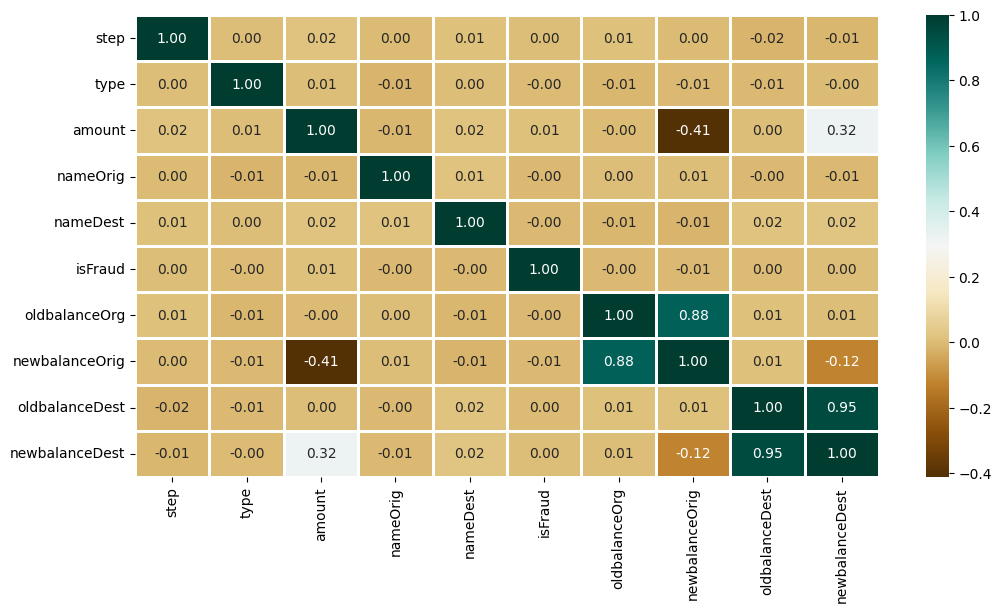

In [29]:
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

# Exclude these non-numeric columns from the correlation calculation.
plt.figure(figsize=(12, 6))
sns.heatmap(df.drop(columns=non_numeric_cols).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

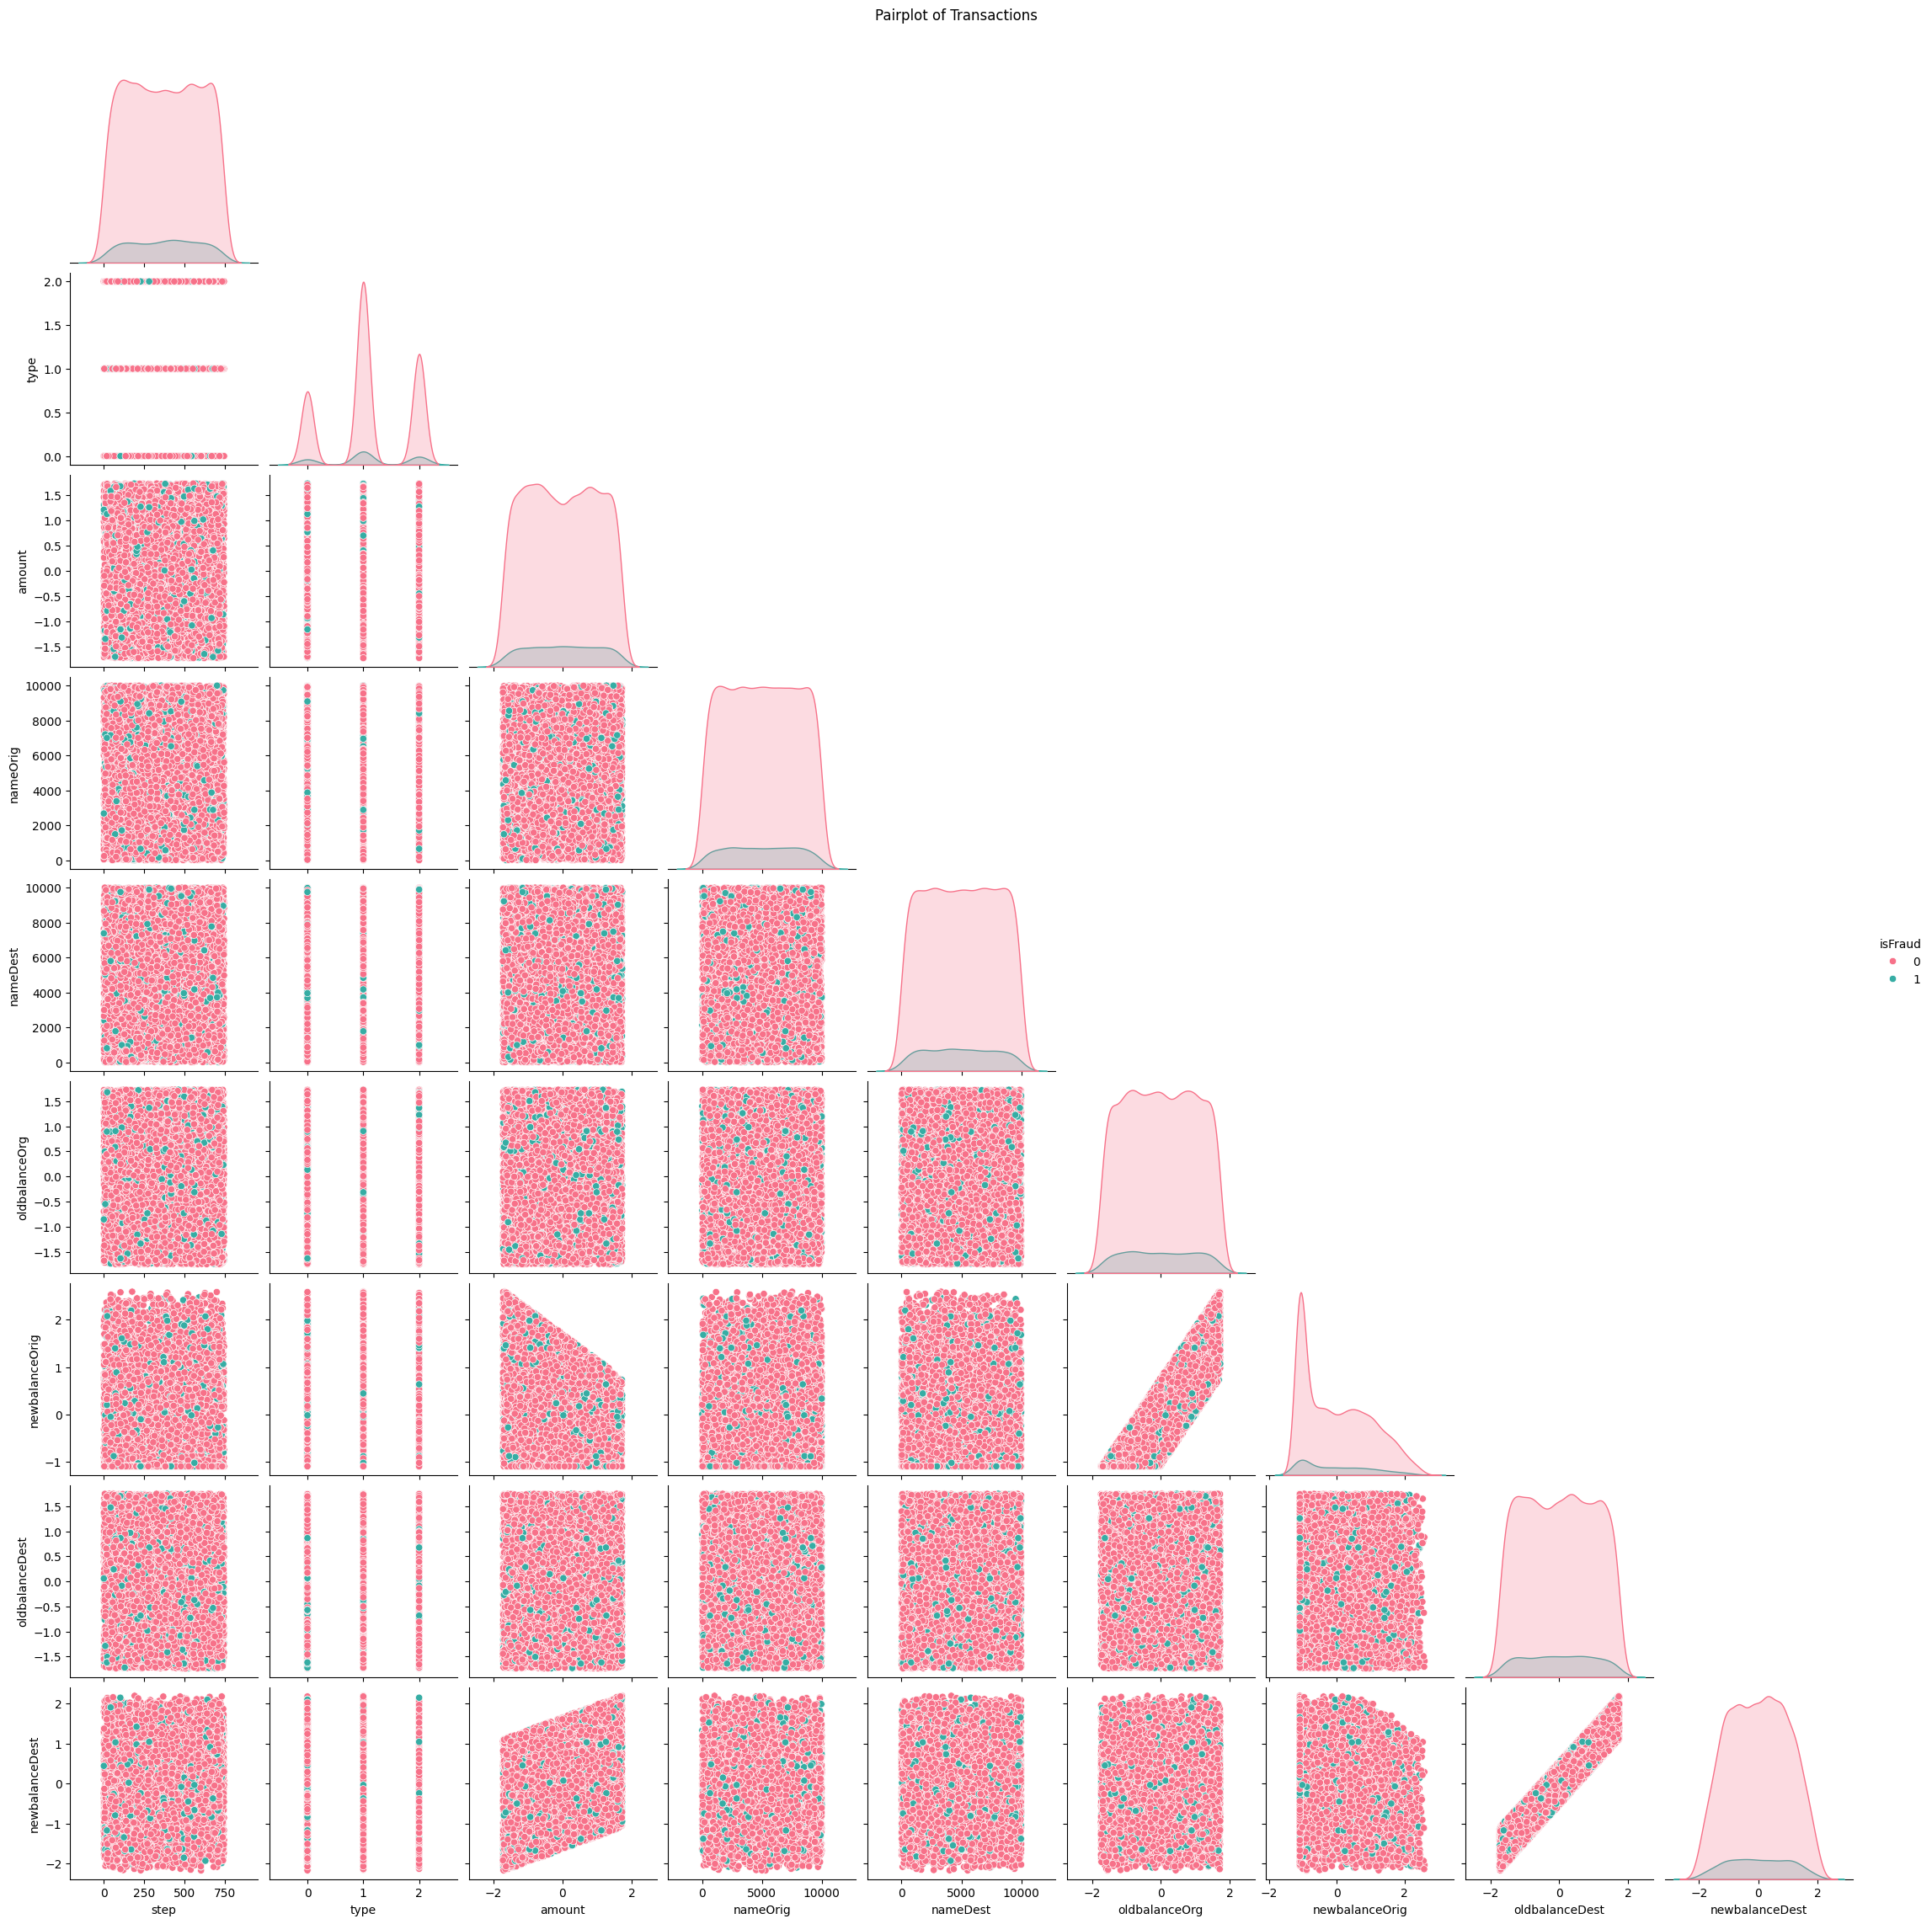

In [42]:
# Visualizing pairplot
sns.pairplot(
    df,
    hue='isFraud',  # Color by the fraud label
    palette='husl',  # Customize colors
    diag_kind='kde',  # Use Kernel Density Estimation for diagonal plots
    corner=True  # Show only the lower triangle
)
plt.suptitle("Pairplot of Transactions", y=1.02)
plt.show()

### Univariate Analysis

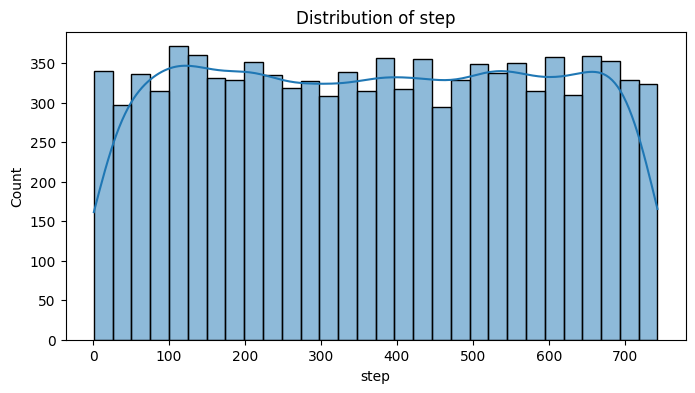

In [30]:
plt.figure(figsize=(8, 4))
sns.histplot(df['step'], kde=True, bins=30)
plt.title(f"Distribution of step")
plt.show()


In [31]:
df['step'].value_counts()

,count
step,
130,25
73,24
700,24
39,24
726,24
...,...
545,5
430,5
719,5


Text(0, 0.5, 'Number of transactions')

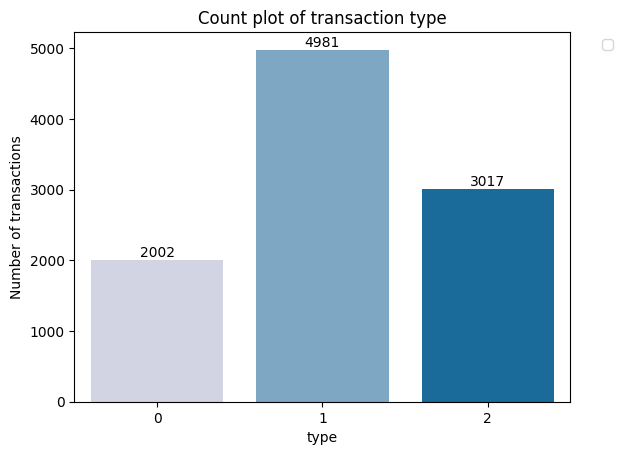

In [32]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

Payment is the most numerous transaction type, followed by payment, cash in, transfer and debit types.

Text(0.5, 1.0, 'Distribution of transaction amount')

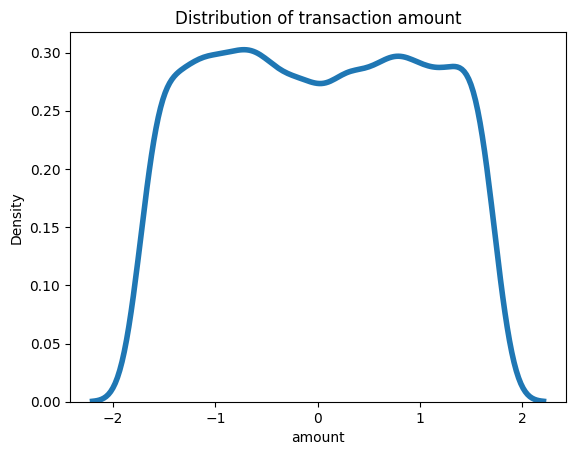

In [33]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

In [34]:
df['nameOrig'].value_counts()


,count
nameOrig,
7456,1
9524,1
790,1
9134,1
1833,1
...,...
9099,1
1740,1
8355,1


Text(0.5, 1.0, 'Distribution of transaction amount')

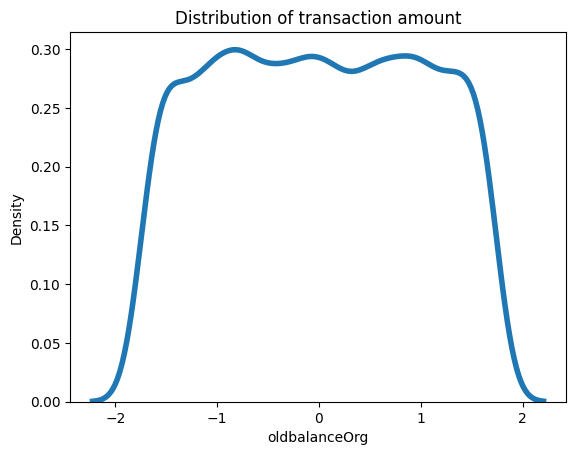

In [35]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

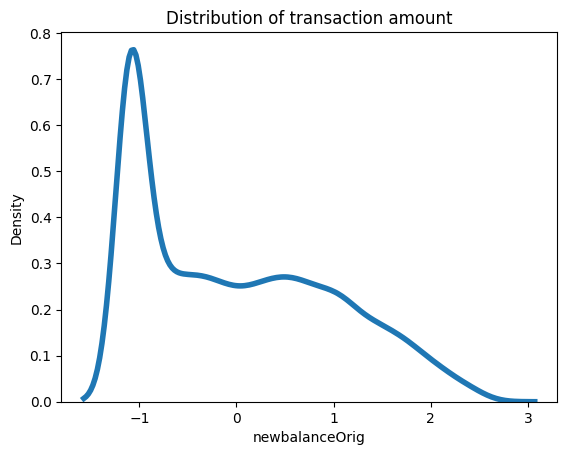

In [36]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

In [37]:
df['nameDest'].value_counts()

,count
nameDest,
29,1
6111,1
2238,1
9511,1
3865,1
...,...
6179,1
6617,1
5116,1


Text(0.5, 1.0, 'Distribution of transaction amount')

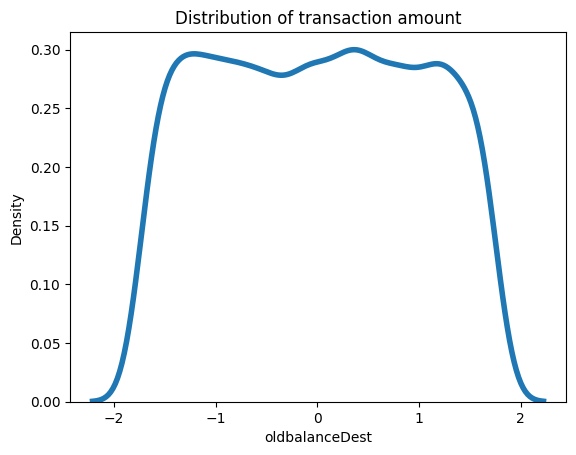

In [38]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

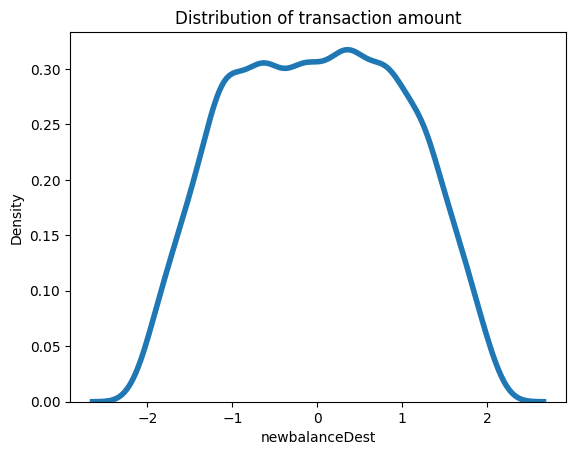

In [39]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

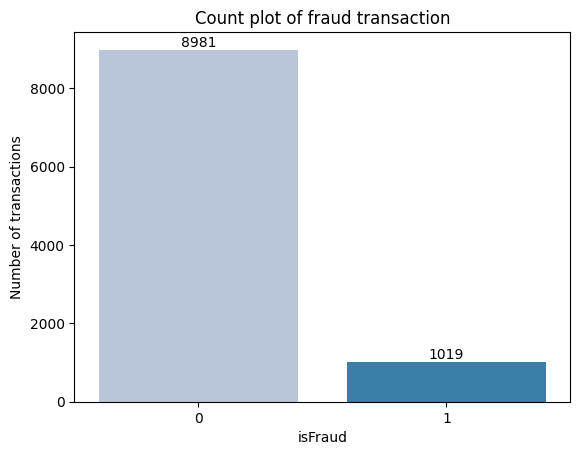

In [40]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

There are much more non-fraudulent transactions than fraudulent transactions.

### Bivariate Analysis

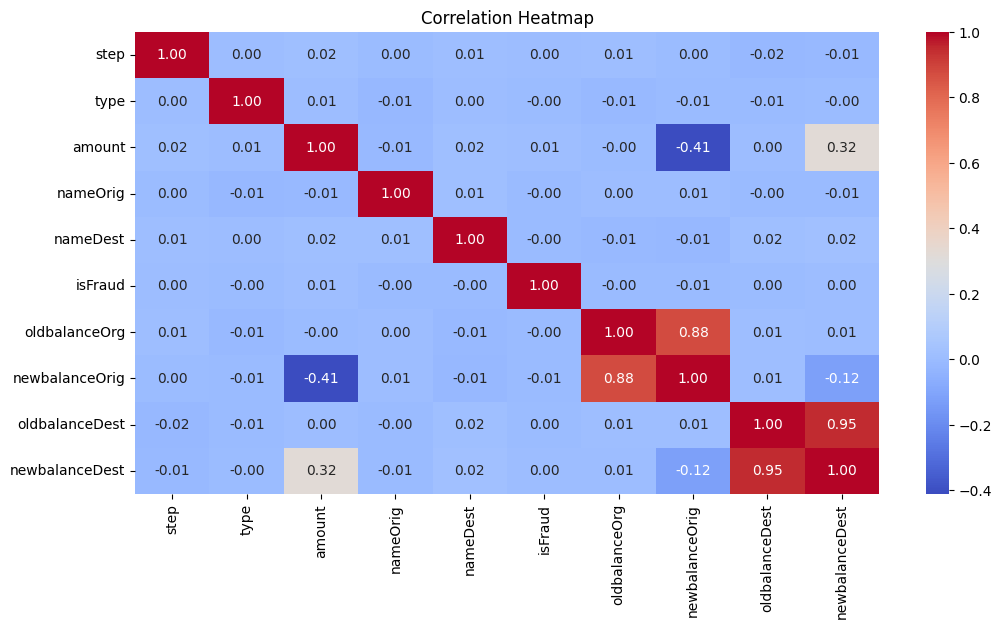

In [41]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Step 4: Data Cleaning and Preprocessing

In [5]:
numerical_columns = df.select_dtypes(include=['float', 'uint8', 'uint16', 'uint32', 'uint64']).columns
categorical_columns = df.select_dtypes(include=['category','object']).columns

### Handle Missing Values



In [ ]:
# # Handling missing values using SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

### Feature Scaling

In [6]:
# Standardization
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


### Feature Encoding

In [7]:
# Encoding categorical features
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


### Split the Dataset

In [8]:
# Define Features (X) and Target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [9]:
print(y.dtypes)
print(y.unique())

int64
[0 1]


In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5 :Training of Multiple Models

a) Resampling Techniques
Oversampling the Minority Class (Fraud): Use techniques like SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic examples for the minority class:

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)


### Logistic Regression

Logistic Regression Accuracy: 0.5095

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.51      0.66      1821
           1       0.09      0.47      0.15       179

    accuracy                           0.51      2000
   macro avg       0.50      0.49      0.40      2000
weighted avg       0.84      0.51      0.61      2000


Confusion Matrix:
 [[934 887]
 [ 94  85]]


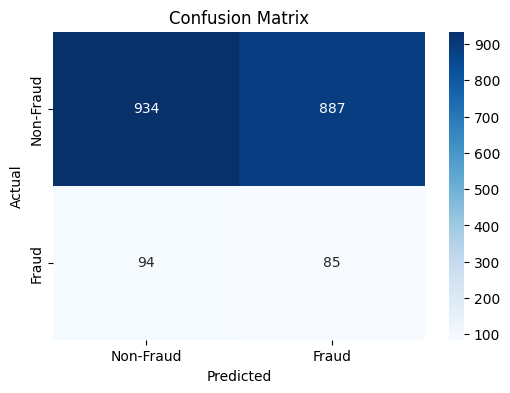

In [16]:
from sklearn.linear_model import LogisticRegression


# Initialize the model
log_reg = LogisticRegression(class_weight='balanced',random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1821
           1       0.09      0.13      0.10       179

    accuracy                           0.80      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.84      0.80      0.82      2000


Confusion Matrix:
 [[1577  244]
 [ 156   23]]


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on balanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_balanced, y_balanced)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       179

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[1821    0]
 [   0  179]]


### XGBoost

In [20]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_balanced, y_balanced)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9035

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.94      1821
           1       0.48      0.87      0.62       179

    accuracy                           0.90      2000
   macro avg       0.73      0.89      0.78      2000
weighted avg       0.94      0.90      0.92      2000


Confusion Matrix:
 [[1651  170]
 [  23  156]]


### AdaBoost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_balanced, y_balanced)

# Predictions
y_pred_ada = ada.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))


AdaBoost Accuracy: 0.616

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75      1821
           1       0.09      0.36      0.14       179

    accuracy                           0.62      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.84      0.62      0.70      2000


Confusion Matrix:
 [[1168  653]
 [ 115   64]]


### Bagging Classifier

In [17]:
from sklearn.ensemble import BaggingClassifier

# Train Bagging Classifier
bagging = BaggingClassifier(
    estimator=LogisticRegression(random_state=42),
    n_estimators=10,
    random_state=42
)
bagging.fit(X_balanced, y_balanced)

# Predictions
y_pred_bagging = bagging.predict(X_test)

# Evaluation
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))


Bagging Classifier Accuracy: 0.651

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78      1821
           1       0.09      0.31      0.14       179

    accuracy                           0.65      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.84      0.65      0.72      2000


Confusion Matrix:
 [[1247  574]
 [ 124   55]]


### Voting Classifier

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define base models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('svc', svc)], voting='soft'
)
voting_clf.fit(X_balanced, y_balanced)

# Predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluation
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))


Voting Classifier Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       0.97      0.97      0.97       179

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix:
 [[1816    5]
 [   5  174]]


### K-Nearest Neighbors (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_balanced, y_balanced)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.768

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.85      1821
           1       0.27      0.97      0.43       179

    accuracy                           0.77      2000
   macro avg       0.63      0.86      0.64      2000
weighted avg       0.93      0.77      0.82      2000


Confusion Matrix:
 [[1363  458]
 [   6  173]]


### Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(kernel='rbf', random_state=42)  # 'rbf' kernel is commonly used; you can try 'linear' or 'poly'

# Train the model
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.9105

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1821
           1       0.00      0.00      0.00       179

    accuracy                           0.91      2000
   macro avg       0.46      0.50      0.48      2000
weighted avg       0.83      0.91      0.87      2000


Confusion Matrix:
 [[1821    0]
 [ 179    0]]


### Hyperparameter Tuning
For most of these models, you can use GridSearchCV to fine-tune hyperparameters and find the best performing model.

In [103]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_balanced, y_balanced)

# Get the best parameters and model
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2715
           1       1.00      1.00      1.00       285

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:
 [[2715    0]
 [   0  285]]


## Model Evaluation

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      2715
           1       0.11      0.40      0.17       285

    accuracy                           0.62      3000
   macro avg       0.51      0.53      0.46      3000
weighted avg       0.84      0.62      0.70      3000



--- Decision Tree ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2715
           1       1.00      1.00      1.00       285

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2715
           1       1.00      1.00      1.00       285

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      300

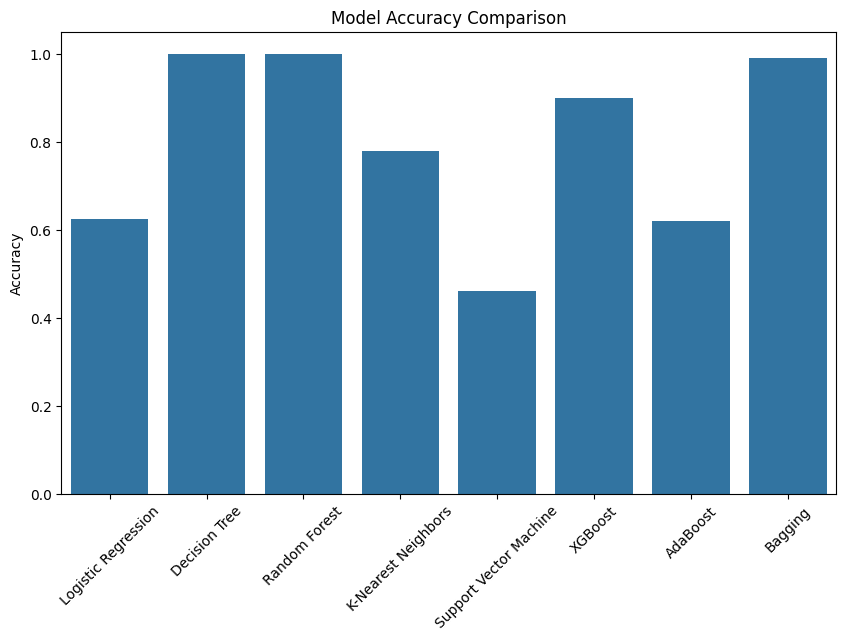

In [48]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Required for ROC AUC
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier()
}


# Initialize lists to store results
accuracies = []
roc_auc_scores = []
models_names = []
classification_reports = []

# Fit models and evaluate
for name, model in models.items():
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Accuracy and ROC AUC
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    accuracies.append(accuracy)
    roc_auc_scores.append(roc_auc)
    models_names.append(name)

    # Print classification report for further insights
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))

    print("\n")

# Plot Accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

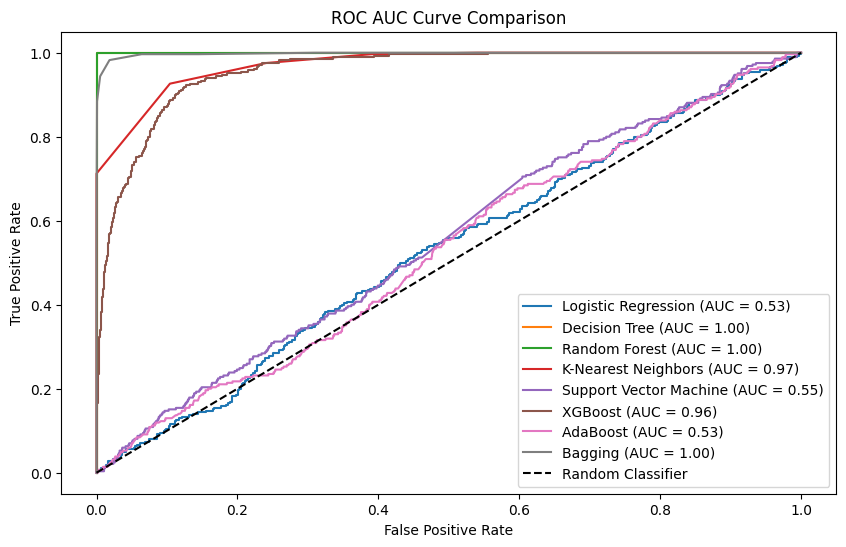

In [49]:
# Plot ROC AUC Curves
plt.figure(figsize=(10, 6))
for i, (name, model) in enumerate(models.items()):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Comparison')
plt.legend(loc='best')
plt.show()



In [50]:
# Create Comparison Table for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = []

for i, report in enumerate(classification_reports):
    accuracy = accuracies[i]
    precision = report['accuracy']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    metrics_values.append([accuracy, precision, recall, f1_score])

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_values, columns=metrics, index=models_names)
print(metrics_df)

                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.624000   0.624000  0.525327  0.463184
Decision Tree           1.000000   1.000000  1.000000  1.000000
Random Forest           1.000000   1.000000  1.000000  1.000000
K-Nearest Neighbors     0.780000   0.780000  0.867461  0.659638
Support Vector Machine  0.461000   0.461000  0.531056  0.388815
XGBoost                 0.898667   0.898667  0.885916  0.780769
AdaBoost                0.620667   0.620667  0.498362  0.452104
Bagging                 0.990000   0.990000  0.969352  0.970830


In [51]:
!mkdir fraud-detection


In [52]:
%cd fraud-detection


/content/fraud-detection


In [101]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Function to Load Data
@st.cache(allow_output_mutation=True)
def load_data():
    return pd.read_csv('online_payment_fraud.csv')

# Function to Train and Save the Model
def train_and_evaluate_model(df):
    # Preprocessing and splitting
    X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
    y = df['isFraud']

    categorical_features = ['type']
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
            ('num', 'passthrough', numerical_features)
        ]
    )

    X_preprocessed = preprocessor.fit_transform(X)

    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X_preprocessed, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
    )

    # Train the model
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    joblib.dump(pipeline, 'fraud_model.pkl')

    # Predictions and evaluation
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=False)  # Fixed this line
    confusion = confusion_matrix(y_test, y_pred)

    return accuracy, report, confusion



# Function to Load the Trained Model
@st.cache(allow_output_mutation=True)
def load_model():
    return joblib.load('fraud_model.pkl')

# Streamlit Web Interface
st.title("Online Payment Fraud Detection")

# Step 1: Load Data
df = load_data()
st.subheader("Dataset Preview")
st.write(df.head())

# Step 2: Visualize Data
st.write("### Fraud Distribution")
fig, ax = plt.subplots()
sns.countplot(x='isFraud', data=df, ax=ax)
ax.set_title("Fraud vs Non-Fraud Transactions")
st.pyplot(fig)

# Step 3: Train the Model
st.subheader("Model Training")
if st.button("Train Model"):
    with st.spinner("Training model..."):
        accuracy, report, confusion = train_and_evaluate_model(df)
    st.success(f"Model Trained Successfully! Accuracy: {accuracy:.2f}")
    st.text("Classification Report:")
    st.text(report)
    st.text("Confusion Matrix:")
    st.write(confusion)

# Step 4: Load the Trained Model
model = None
try:
    model = load_model()
except:
    st.warning("Please train the model first by clicking the 'Train Model' button.")

# Step 5: Make Predictions
st.subheader("Make a Prediction")
if model:
    # Collect user input for prediction
    step = st.number_input('Step', min_value=1, max_value=744, value=100)
    txn_type = st.selectbox('Transaction Type', df['type'].unique())
    amount = st.number_input('Amount', min_value=0.0, value=100.0)
    oldbalanceOrg = st.number_input('Old Balance Origin', min_value=0.0, value=100000.0)
    newbalanceOrig = st.number_input('New Balance Origin', min_value=0.0, value=90000.0)
    oldbalanceDest = st.number_input('Old Balance Destination', min_value=0.0, value=150000.0)
    newbalanceDest = st.number_input('New Balance Destination', min_value=0.0, value=160000.0)

    if st.button("Predict Fraud"):
        # Prepare input data for prediction
        input_data = pd.DataFrame({
            'step': [step],
            'type': [txn_type],
            'amount': [amount],
            'oldbalanceOrg': [oldbalanceOrg],
            'newbalanceOrig': [newbalanceOrig],
            'oldbalanceDest': [oldbalanceDest],
            'newbalanceDest': [newbalanceDest]
        })

        try:
            # Use the trained pipeline to transform and predict
            prediction = model.predict(input_data)[0]
            prediction_proba = model.predict_proba(input_data)[0][1]

            # Display result
            if prediction == 1:
                st.error(f"**Fraudulent Transaction!** (Probability: {prediction_proba:.2f})")
            else:
                st.success(f"**Legitimate Transaction.** (Probability: {1 - prediction_proba:.2f})")
        except Exception as e:
            st.error(f"Error during prediction: {e}")


Overwriting app.py


In [53]:
from google.colab import files
uploaded = files.upload()  # Select `online_payment_fraud.csv` from your local machine


Saving online_payment_fraud.csv to online_payment_fraud.csv


In [56]:
!rm requirements.txt


In [78]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib
imblearn


Overwriting requirements.txt


In [79]:
!cat requirements.txt


pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib
imblearn


In [80]:
!pip install -r requirements.txt


In [102]:
from google.colab import files

# Download app.py
files.download('app.py')

# Download requirements.txt
files.download('requirements.txt')

# Download dataset (if uploaded)
files.download('online_payment_fraud.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>